### Problem Statement

You are a data scientist / AI engineer working on an environmental impact analysis project. You have been provided with a dataset named **`"environmental_impact_data.csv"`**, which includes various socio-economic and environmental factors influencing the environmental impact score of different regions. The dataset comprises the following columns:

- `pollution_level:` The pollution level in AQI (Air Quality Index).
- `resource_consumption:` The resource consumption in tons.
- `population_density:` The population density in people per km².
- `economic_activity:` The economic activity in millions.
- `industrial_activity:` The industrial activity in index units.
- `traffic_density:` The traffic density in vehicles per km.
- `waste_generation:` The waste generation in kg per capita.
- `renewable_energy_usage:` The renewable energy usage in percentage.
- `air_quality_index:` The air quality index.
- `carbon_footprint:` The carbon footprint in tons per year.
- `environmental_impact_score:` The environmental impact score ranging from 0 to 100.

Your task is to analyze this dataset to understand the relationships between these factors and the environmental impact score. You will also evaluate multicollinearity among the features using correlation and Variance Inflation Factor (VIF). Finally, you will build machine learning models to predict the environmental impact score based on the selected features.

In [38]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Data Preparation and Exploration

In [40]:
df = pd.read_csv("environmental_impact_data.csv")
df.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,41.84,68.83,338.27,93.18,104.96,216.85,57.15,28.66,58.02,287.70,74.87
1,38.46,72.14,353.67,120.44,72.86,233.87,46.07,36.61,92.69,322.34,43.70
2,54.97,60.23,324.93,114.66,72.64,221.37,34.13,30.88,81.90,329.35,57.47
3,56.35,71.60,202.88,127.56,75.76,129.26,47.93,24.88,76.20,300.33,21.75
4,54.00,65.76,292.23,80.19,63.19,239.81,56.24,39.24,88.57,327.12,48.77


In [41]:
df.shape

(100, 11)

In [42]:
df.describe()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,48.808000,70.729900,300.088900,102.005900,77.453800,202.344900,49.75010,30.085500,80.22250,294.236400,45.309100
std,8.784509,8.804049,49.082548,18.634315,15.582053,35.482795,9.40057,5.199462,10.18513,45.320703,21.458624
min,28.440000,51.870000,173.960000,50.250000,42.180000,113.550000,28.73000,16.270000,51.98000,103.880000,0.000000
25%,43.260000,65.392500,269.847500,90.840000,66.410000,181.335000,43.84500,27.102500,74.03250,265.042500,30.827500
50%,50.130000,69.500000,298.965000,102.965000,75.995000,204.720000,49.94000,29.600000,81.26000,300.220000,43.815000
75%,54.745000,76.310000,334.762500,114.600000,88.005000,226.825000,55.65250,33.937500,86.09000,321.282500,60.540000
max,70.460000,92.410000,402.730000,140.270000,121.530000,276.940000,70.27000,40.860000,105.30000,383.820000,100.000000


### Feature Selection Using Correlation

<Axes: >

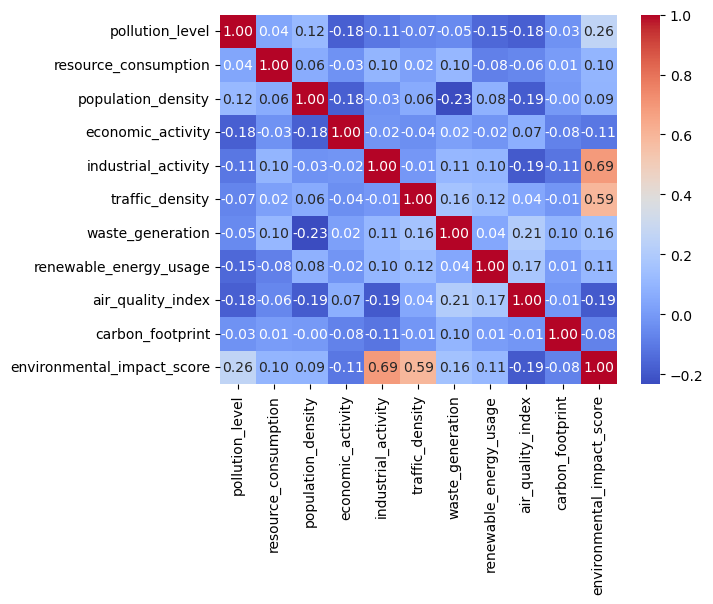

In [44]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')

In [45]:
cm["environmental_impact_score"]

pollution_level               0.258833
resource_consumption          0.095307
population_density            0.091759
economic_activity            -0.107769
industrial_activity           0.690698
traffic_density               0.594056
waste_generation              0.155242
renewable_energy_usage        0.112714
air_quality_index            -0.191543
carbon_footprint             -0.075185
environmental_impact_score    1.000000
Name: environmental_impact_score, dtype: float64

In [46]:
cm_eis = abs(cm["environmental_impact_score"])
cm_eis

pollution_level               0.258833
resource_consumption          0.095307
population_density            0.091759
economic_activity             0.107769
industrial_activity           0.690698
traffic_density               0.594056
waste_generation              0.155242
renewable_energy_usage        0.112714
air_quality_index             0.191543
carbon_footprint              0.075185
environmental_impact_score    1.000000
Name: environmental_impact_score, dtype: float64

In [47]:
cm_eis[cm_eis > 0.2].index

Index(['pollution_level', 'industrial_activity', 'traffic_density',
       'environmental_impact_score'],
      dtype='object')

In [48]:
selected_features = cm_eis[cm_eis > 0.25].index.drop('environmental_impact_score')
selected_features

Index(['pollution_level', 'industrial_activity', 'traffic_density'], dtype='object')

In [69]:
X = df[selected_features]
y = df['environmental_impact_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("r2   ",r2)
print("MSE   ",mse)

r2    0.9694860188985326
MSE    11.4491146823855


# Scaling

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pollution_level             100 non-null    float64
 1   resource_consumption        100 non-null    float64
 2   population_density          100 non-null    float64
 3   economic_activity           100 non-null    float64
 4   industrial_activity         100 non-null    float64
 5   traffic_density             100 non-null    float64
 6   waste_generation            100 non-null    float64
 7   renewable_energy_usage      100 non-null    float64
 8   air_quality_index           100 non-null    float64
 9   carbon_footprint            100 non-null    float64
 10  environmental_impact_score  100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


In [80]:
from sklearn.preprocessing import MinMaxScaler

# here we created a dataframe with scaled columns and unscaled target 

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['environmental_impact_score']))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

df_scaled['environmental_impact_score'] = df['environmental_impact_score']
df_scaled.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,0.318896,0.418352,0.718232,0.476894,0.791178,0.632230,0.684160,0.503863,0.113278,0.656641,74.87
1,0.238458,0.500000,0.785549,0.779716,0.386641,0.736398,0.417429,0.827166,0.763503,0.780382,43.70
2,0.631366,0.206216,0.659920,0.715508,0.383869,0.659894,0.129995,0.594144,0.561140,0.805423,57.47
3,0.664208,0.486680,0.126415,0.858809,0.423188,0.096150,0.462205,0.350142,0.454239,0.701758,21.75
4,0.608282,0.342625,0.516982,0.332593,0.264776,0.772752,0.662253,0.934120,0.686234,0.797457,48.77


### Feature Selection Using VIF

In [90]:
# Compute the Variance Inflation Factor (VIF) for each of the features except target variable.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Variable"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [92]:
X =  df_scaled.drop('environmental_impact_score',axis=1)          # drop target
calculate_vif(X)

,Variable,VIF
0,pollution_level,5.791073
1,resource_consumption,5.676857
2,population_density,7.783071
3,economic_activity,7.470285
4,industrial_activity,6.037037
5,traffic_density,7.310719
6,waste_generation,7.114373
7,renewable_energy_usage,8.735315
8,air_quality_index,8.909886
9,carbon_footprint,14.231671


In [94]:
X =  X.drop('carbon_footprint', axis=1)
calculate_vif(X)

,Variable,VIF
0,pollution_level,5.520889
1,resource_consumption,5.596802
2,population_density,7.368959
3,economic_activity,7.179938
4,industrial_activity,6.009814
5,traffic_density,7.241070
6,waste_generation,6.846750
7,renewable_energy_usage,8.567780
8,air_quality_index,8.613146


In [96]:
X =  X.drop('air_quality_index', axis=1)
calculate_vif(X)

,Variable,VIF
0,pollution_level,5.497156
1,resource_consumption,5.566377
2,population_density,7.359491
3,economic_activity,6.600133
4,industrial_activity,5.920690
5,traffic_density,7.152634
6,waste_generation,6.237475
7,renewable_energy_usage,7.685256


In [98]:
X.columns

Index(['pollution_level', 'resource_consumption', 'population_density',
       'economic_activity', 'industrial_activity', 'traffic_density',
       'waste_generation', 'renewable_energy_usage'],
      dtype='object')

In [100]:
X = df.drop(["environmental_impact_score","carbon_footprint","air_quality_index"], axis=1)
y = df["environmental_impact_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model_full = LinearRegression()
model_full.fit(X_train, y_train)
model_full.score(X_test, y_test)

0.9742394259105335